# Measurement-induced dephasing on Starmon-5

In [2]:
import time
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from typing import List
import itertools as it

import qiskit
import qiskit.tools.jupyter
from qiskit import QuantumCircuit
import qiskit.circuit.library.standard_gates as gates
from qiskit.tools.visualization import circuit_drawer, plot_histogram

# from alive_progress import alive_it, alive_bar
from tqdm import tqdm

# import pyperclip as clip
from importlib import reload
import inspire_experiments
reload(inspire_experiments)
from inspire_experiments import ExperimentData, get_starmon_status, inspire_login, get_file_header, measure_readout_correction

# %matplotlib notebook
%matplotlib inline
%qiskit_version_table

In [3]:
api, backend = inspire_login()
backend.status()

Backend status:  IDLE


In [4]:
get_starmon_status(api)

'IDLE'

## Measurements

In [5]:
def measure_msmt_induced_dephasing(
        measured_qb: int,
        tested_qb: int=None,
        tested_qb_state: str='',
        id_gates: bool=True,
        do_tomography: bool=True,
        tomography_on_equator: bool=True,
        exp_basename: str="msmt_induced_dephasing",
        extra_label: str=None,
        show_circuit: bool=False,
        send_jobs: bool=True
):
    jobs = []
    circuits = []
    if do_tomography:
        # tomo_gates = {'X': ('ry', -np.pi/2), 'Y': ('rx', np.pi/2), 'Z': ('id',  None)}
        tomo_gates = {'X': gates.RYGate(-np.pi/2), 'Y': gates.RXGate(np.pi/2), 'Z': gates.IGate()}
    else:
        # tomo_gates = {'Z': ('id', None)}
        tomo_gates = {'Z': gates.IGate()}

    for tomo_option, gate in tomo_gates.items():
        circuit = QuantumCircuit(5,5)
        circuit.rx(np.pi/2, measured_qb)
        if tested_qb is not None: # can't autocast here, qb can be 0!
            if tested_qb_state == '' or tested_qb_state == '0':
                circuit.id(tested_qb)
            elif tested_qb_state == '1':
                circuit.x(tested_qb)
            elif tested_qb_state == '+':
                circuit.ry(np.pi/2, tested_qb)
            else:
                raise ValueError(f"State of tested qubit {tested_qb_state} unknown!")
        circuit.barrier(range(5))
        if tested_qb is not None: # can't autocast here, qb can be 0!
            circuit.measure(tested_qb, tested_qb)
        if id_gates:
            # 100 x 20ns ID gate = 2mus = msmt length
            for _ in range(100):
                circuit.id(measured_qb)
        circuit.barrier(range(5))
        if not tomography_on_equator:
            circuit.rx(np.pi/2, measured_qb)
            circuit.barrier(range(5))
        # getattr(circuit, gate)(angle, measured_qb) if angle is not None else getattr(circuit, gate)(measured_qb)

        circuit.append(gate, [measured_qb])
        circuit.measure(measured_qb, measured_qb)
        circuits += [circuit]

        if show_circuit:
            display(circuit.draw(output='mpl'))

        exp_name = exp_basename + f"_qbs{measured_qb, tested_qb}"
        exp_name += f"_testedQb{tested_qb_state}" if tested_qb else ''
        exp_name += "_eqTomo" if tomography_on_equator else ''
        exp_name += "_noIDs" if not id_gates else ''
        exp_name += extra_label if extra_label else ''
        exp_name += f"_M{tomo_option}" if do_tomography else ''
        print(exp_name)

        if send_jobs:
            header = get_file_header(circuit)
            job = qiskit.execute(circuit, shots=2**14, optimization_level=0, backend=backend)
            ExperimentData.save_job_result(job, exp_name, header)
            jobs += [job]

    return jobs, circuits

## Measure all pairs

IDLE


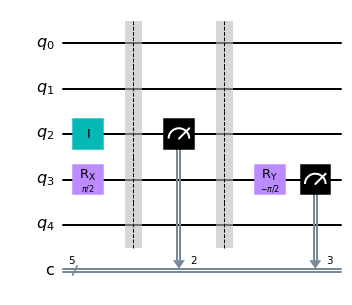

msmt_induced_dephasing_qbs(3, 2)_testedQb0_eqTomo_noIDs_MX


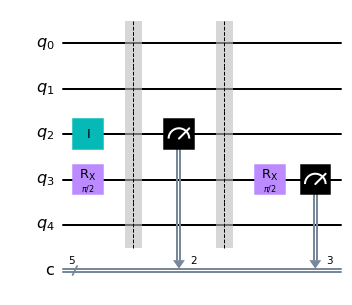

msmt_induced_dephasing_qbs(3, 2)_testedQb0_eqTomo_noIDs_MY


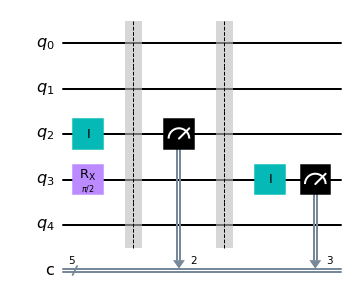

msmt_induced_dephasing_qbs(3, 2)_testedQb0_eqTomo_noIDs_MZ
IDLE


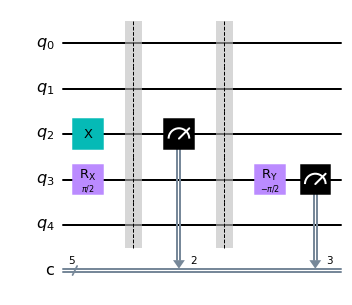

msmt_induced_dephasing_qbs(3, 2)_testedQb1_eqTomo_noIDs_MX


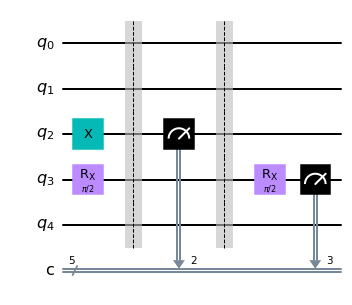

msmt_induced_dephasing_qbs(3, 2)_testedQb1_eqTomo_noIDs_MY


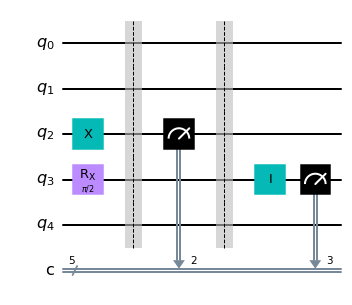

msmt_induced_dephasing_qbs(3, 2)_testedQb1_eqTomo_noIDs_MZ
IDLE


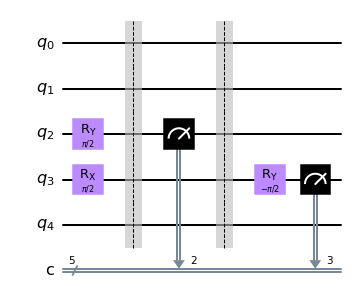

msmt_induced_dephasing_qbs(3, 2)_testedQb+_eqTomo_noIDs_MX


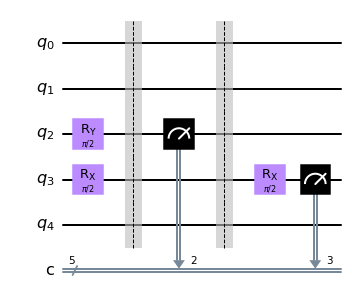

msmt_induced_dephasing_qbs(3, 2)_testedQb+_eqTomo_noIDs_MY


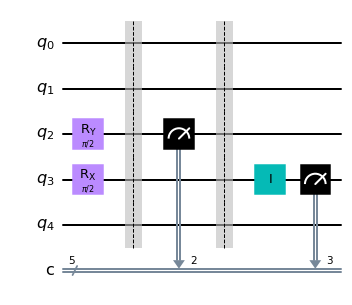

msmt_induced_dephasing_qbs(3, 2)_testedQb+_eqTomo_noIDs_MZ
IDLE


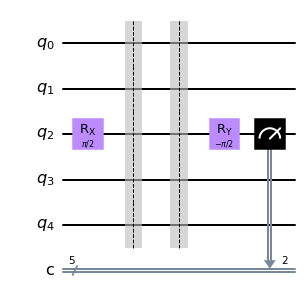

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MX


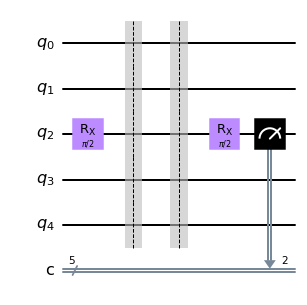

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MY


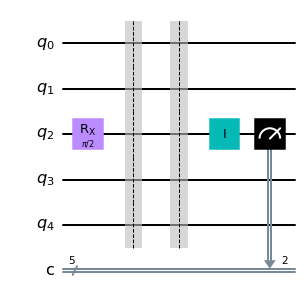

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MZ
IDLE


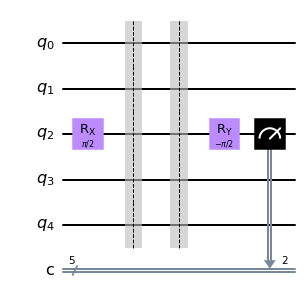

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MX


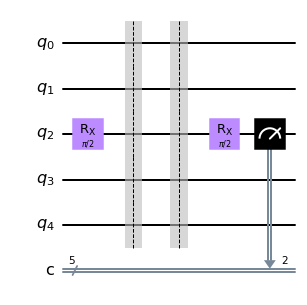

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MY


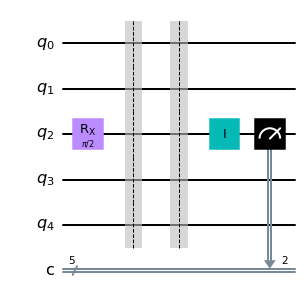

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MZ
IDLE


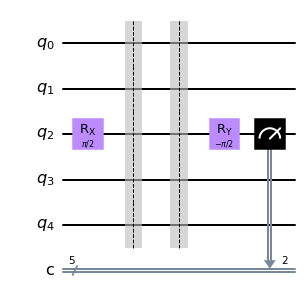

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MX


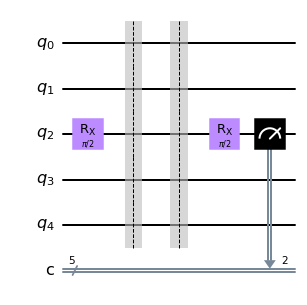

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MY


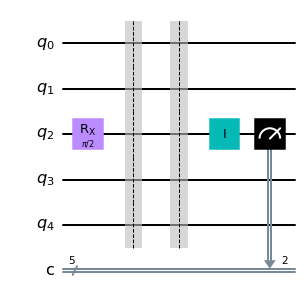

msmt_induced_dephasing_qbs(2, None)_eqTomo_noIDs_MZ
IDLE


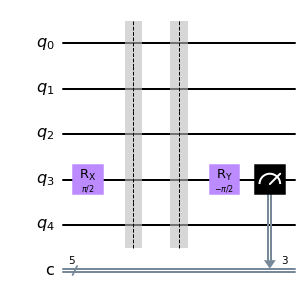

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MX


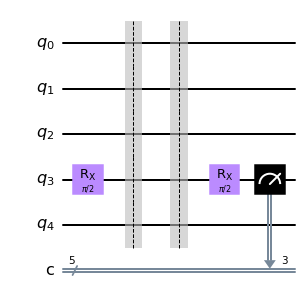

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MY


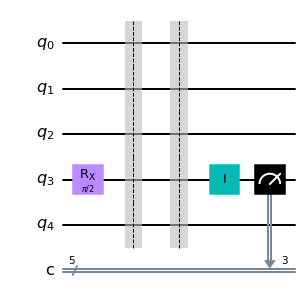

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MZ
IDLE


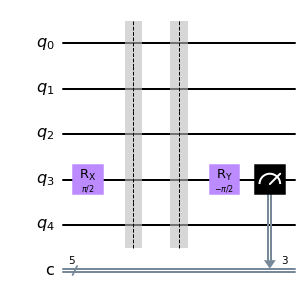

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MX


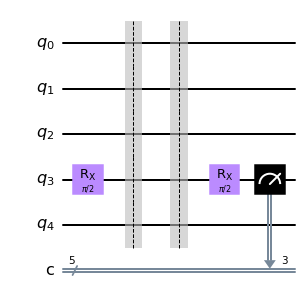

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MY


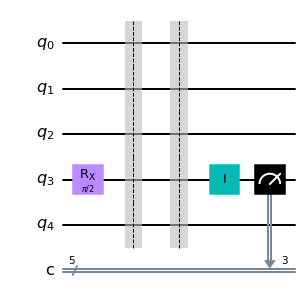

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MZ
IDLE


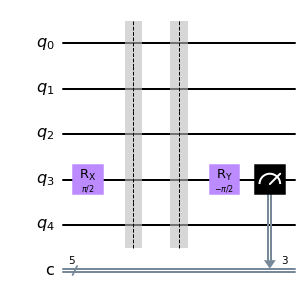

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MX


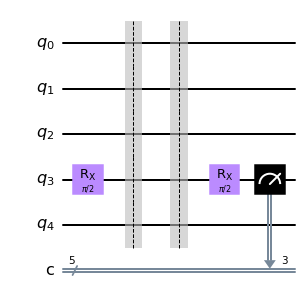

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MY


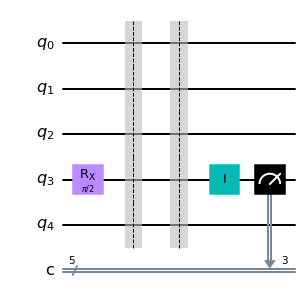

msmt_induced_dephasing_qbs(3, None)_eqTomo_noIDs_MZ


In [7]:
# pairs = [(2,1), (2,3), (3,2), (2, None), (3, None)]
pairs = [ (3,2), (2, None), (3, None)]
states = ['0', '1', '+']
# pairs = [(2, None), (3, None)]

for pair in pairs:
    for state in states:
        print(get_starmon_status(api))
        measure_msmt_induced_dephasing(*pair, id_gates=False, tested_qb_state=state, send_jobs=False, show_circuit=True)
        # if pair[1] is None:
        #     measure_readout_correction(qubits=[pair[0]], extra_label=f"_testedQb{state}", backend=backend, send_jobs=False, show_circuit=True)
        #     break

